In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('c:/data/dog_cat/annotations/list.txt', skiprows=6, delimiter=' ', header=None)
df.columns = ['file_name', 'id', 'species', 'breed']
df


,file_name,id,species,breed
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


In [3]:
print(df['species'].value_counts().sort_index())

species
1    2371
2    4978
Name: count, dtype: int64


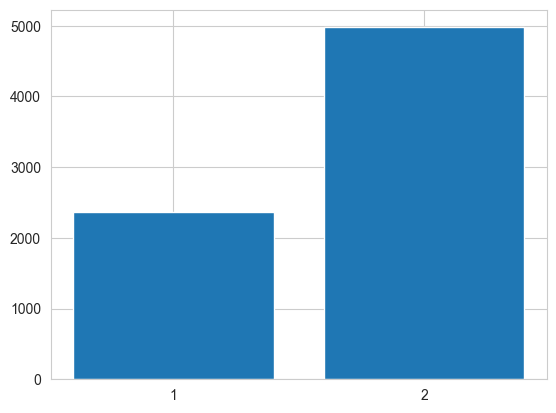

In [4]:
value_counts = df['species'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.show()

In [5]:
import os
from glob import glob

image_dir = os.path.join('c:/data/dog_cat/images/')
bbox_dir = os.path.join('c:/data/dog_cat/annotations/xmls/')
seg_dir = os.path.join('C:/data/dog_cat/annotations/trimaps/')

image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
len(image_files)

7390

In [6]:
print(bbox_dir)

c:/data/dog_cat/annotations/xmls/


In [7]:
image_files[:10]

['Abyssinian_1.jpg',
 'Abyssinian_10.jpg',
 'Abyssinian_100.jpg',
 'Abyssinian_101.jpg',
 'Abyssinian_102.jpg',
 'Abyssinian_103.jpg',
 'Abyssinian_104.jpg',
 'Abyssinian_105.jpg',
 'Abyssinian_106.jpg',
 'Abyssinian_107.jpg']

In [8]:
seg_files = glob(seg_dir+'*.png')
len(seg_files)

7390

In [9]:
bbox_files = glob(bbox_dir +'*.xml')
len(bbox_files)

3686

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedGroupKFold

skf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)

df['fold'] = -1
for idx, (t, v) in enumerate(skf.split(df, df['id']), 1):
    print(t, v, len(v))
    df.loc[v, 'fold'] = idx

print(len(df[df['fold'] == 1]))
print(len(df[df['fold'] != 1]))

[   1    2    3 ... 7346 7347 7348] [0] 1
[   0    1    2 ... 7346 7347 7348] [] 0
[   0    1    2 ... 7346 7347 7348] [] 0
[   0    1    2 ... 7346 7347 7348] [] 0
[   0    1    2 ... 7346 7347 7348] [] 0
1
7348


In [17]:
df

,file_name,id,species,breed,fold
0,Abyssinian_100,1,1,1,1
1,Abyssinian_101,1,1,1,-1
2,Abyssinian_102,1,1,1,-1
3,Abyssinian_103,1,1,1,-1
4,Abyssinian_104,1,1,1,-1
...,...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25,-1
7345,yorkshire_terrier_97,37,2,25,-1
7346,yorkshire_terrier_98,37,2,25,-1
7347,yorkshire_terrier_99,37,2,25,-1


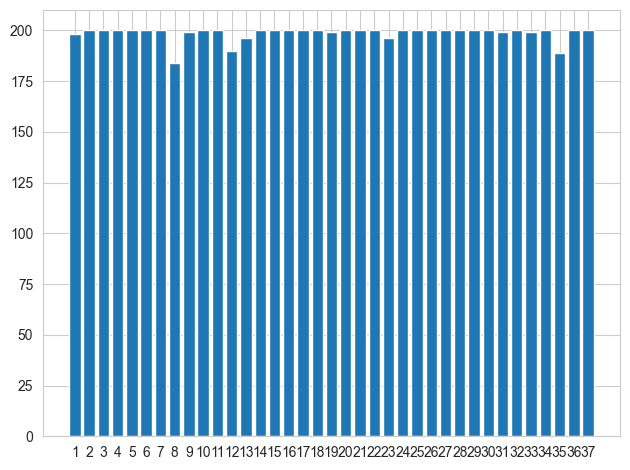

In [18]:
value_counts = df[df['fold'] != 5]['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)
plt.tight_layout()
plt.show()

